In [1]:
# import
import os
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from scipy.spatial import distance
from sklearn.cluster import KMeans
from tqdm import tqdm

# import plotting libraries
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
plt.rcParams['svg.fonttype'] = 'none'
import seaborn as sns
from nilearn import datasets
from nilearn import plotting

# import network_control functions
from network_control.energies import ComputeControlEnergy, integrate_u
from network_control.energies import optimal_input as get_control_inputs
from network_control.metrics import ave_control
from network_control.utils import matrix_normalization, convert_states_str2float, normalize_state, get_null_p
from network_control.plotting import roi_to_vtx, null_plot, surface_plot
from null_models.geomsurr import geomsurr

In [2]:
# directory where data is stored
datadir = '/Users/lindenmp/Google-Drive-Penn/work/research_projects/control_package/data'
resultsdir = '/Users/lindenmp/Google-Drive-Penn/work/research_projects/control_package/results'
A_file = 'pnc_schaefer200_Am.npy'

In [3]:
# load A matrix
A = np.load(os.path.join(datadir, A_file))
n_nodes = A.shape[0]
print(A.shape)

(200, 200)


In [4]:
# normalize
A[np.eye(A.shape[0]).astype(bool)] = 0
# version = 'discrete'
version = 'continuous'
A_norm = matrix_normalization(A, version=version, c=1)

In [5]:
# compute average controllability
ac = ave_control(A_norm, version=version)

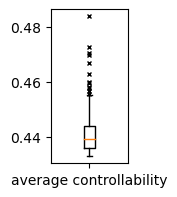

In [6]:
# plot distribution of values
f, ax = plt.subplots(figsize=(1, 2))
ax.boxplot(ac, flierprops={'marker': 'x', 'markersize': 3})
ax.set_xticklabels(['average controllability'])
# ax.set_yscale('log')
f.savefig(os.path.join(resultsdir, 'ave_ctrb_boxplot.svg'), dpi=600, bbox_inches='tight', pad_inches=0.01)
plt.show()

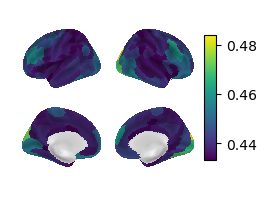

In [7]:
# rank data for plotting
plot_rank = False
if plot_rank:
    data = sp.stats.rankdata(ac)
    fig_label = 'ave_ctrb_rank_brainplot.png'
else:
    data = ac
    fig_label = 'ave_ctrb_brainplot.png'

# plot states on brain surface
lh_annot_file = '/Users/lindenmp/Google-Drive-Penn/work/research_projects/connectome_loader/data/schaefer_parc/fsaverage5' \
                '/lh.Schaefer2018_200Parcels_7Networks_order.annot'
rh_annot_file = '/Users/lindenmp/Google-Drive-Penn/work/research_projects/connectome_loader/data/schaefer_parc/fsaverage5' \
                '/rh.Schaefer2018_200Parcels_7Networks_order.annot'
fsaverage = datasets.fetch_surf_fsaverage(mesh='fsaverage5')
cmap = 'viridis'

f = surface_plot(data=data, lh_annot_file=lh_annot_file, rh_annot_file=rh_annot_file,
                 fsaverage=fsaverage, order='lr', cmap='viridis')
f.savefig(os.path.join(resultsdir, fig_label), dpi=600, bbox_inches='tight', pad_inches=0.01)
